In [1]:
suppressPackageStartupMessages(library(Signac))
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(GenomeInfoDb))
suppressPackageStartupMessages(library(EnsDb.Hsapiens.v86))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(Matrix))
suppressPackageStartupMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(zellkonverter))
suppressPackageStartupMessages(library(scuttle))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(JASPAR2020))
suppressPackageStartupMessages(library(TFBSTools))
suppressPackageStartupMessages(library(Hmisc))

In [2]:
plan(strategy = "multicore", workers = 8)
options(future.globals.maxSize = 100 * 1024 ^ 3)

In [3]:
CelltypeColors <- c('#ffff00', '#1ce6ff', '#ff34ff', '#ff4a46', '#008941', '#006fa6',
       '#a30059', '#ffdbe5', '#7a4900', '#0000a6', '#63ffac', '#b79762',
       '#004d43', '#8fb0ff', '#997d87', '#5a0007', '#809693', '#6a3a4c',
       '#1b4400', '#4fc601', '#3b5dff', '#4a3b53', '#ff2f80', '#61615a',
       '#ba0900', '#6b7900', '#00c2a0', '#ffaa92', '#ff90c9', '#b903aa',
       '#d16100', '#ddefff', '#000035', '#7b4f4b', '#a1c299', '#300018',
       '#0aa6d8', '#013349', '#00846f', '#372101', '#ffb500', '#c2ffed',
       '#a079bf', '#cc0744', '#c0b9b2', '#c2ff99', '#001e09', '#00489c',
       '#6f0062', '#0cbd66', '#eec3ff', '#456d75', '#b77b68', '#7a87a1',
       '#788d66', '#885578', '#fad09f', '#ff8a9a', '#d157a0', '#bec459',
       '#456648', '#0086ed', '#886f4c')

names(CelltypeColors)<-c('AT1', 'AT2_c01-ABCA3', 'AT2_c02-ABCC3', 'AT2_c03-VASP',
                         'AT2_c04-KCNQ3','AT2_c05-NOS1', 'AT2_c06-ESYT2',
                         'B_c01-MS4A1-BANK1', 'B_c02-LPP', 'Basal_c01-EGFR',
       'Basal_c02-LAMC2', 'Basal_c03-KRT6A', 'Basal_c04-TMPRSS4',
        'Ciliated', 'Club', 'DC_c01-WDFY4',
       'DC_c02-LAMP3', 'DC_c03-MCOLN2', 'Doublets', 'Endothelial_c01-IL1R1',
       'Endothelial_c02-PRX', 'Endothelial_c03-SMAD3', 'Endothelial_c04-FLT4',
       'Endothelial_c05-PREX1', 'Endothelial_c06-PLPP1',
       'Fibroblast_c01-PDE4C', 'Fibroblast_c02-SPSB1', 'Fibroblast_c03-ABCA10',
       'Fibroblast_c04-SLC12A8', 'Goblet', 'Macro_c01-THBS1', 'Macro_c02-MSR1',
       'Macro_c03-PLIN2', 'Macro_c04-PDE4C', 'Macro_c05-MERTK',
       'Macro_c06-CIITA', 'Macro_c07-EREG', 'Macro_c08-SPP1',
       'Macro_c09-PPARG', 'Macro_c10-FMNL2', 'Macro_c11-DNAJB1', 'Mast',
       'Myofibroblast_c01-POSTN', 'Myofibroblast_c02-BMP5',
       'Myofibroblast_c03-RUNX2', 'Myofibroblast_c04-SERPINE1', 'NK',
       'Neuron cells', 'Pericyte_c01-ADAMTS9', 'Pericyte_c02-PDGFRB',
       'Plasma_c01-MZB1-XBP1', 'Plasma_c02-DNAJB1', 'Plasma_c03-NR4A3', 'SMC',
       'T_CD4_c01-CCR7', 'T_CD4_c02-ADAM19', 'T_CD4_c03-FOXP3',
       'T_CD4_c04-TSHZ2', 'T_CD8_c05-CRTAM', 'T_CD8_c06-GNLY',
       'T_CD8_c07-DNAJB1', 'T_c08-MKI67', 'Unknown')


Major_cluster_colors=c('#D51F26','#272E6A','#208A42','#89288F','#F47D2B','#FEE500','#8A9FD1')

names(Major_cluster_colors)=c('B cells','Endothelial cells','Epithelial cells','Myeloid',
                              'Neuron cells','Stromal cells','T cells')

TissueColors=c('IPF'='#D51F26','IPF_tumor'='#272E6A','IPF_tumor_adjacent'='#208A42',
               'IPF_tumor_remote'='#89288F','Normal'='#F47D2B','Tumor'='#FEE500')

# Data

In [4]:
adata=readRDS('/data1/liyuzhe/data_share/adata_peaks.rds')
adata

An object of class Seurat 
832133 features across 93886 samples within 3 assays 
Active assay: peaks (245045 features, 0 variable features)
 2 other assays present: ATAC, RNA
 10 dimensional reductions calculated: pca, umap.rna, harmony.rna, umap.rna.harmony, lsi, LSI, umap.atac, harmony.atac, umap.atac.harmony, wnn.umap

In [5]:
GetFragmentData(object = Fragments(adata)[[2]], slot = "path")

[1] "/data1/liyuzhe/data_share/IPF_fragments_sorted.bed.gz"

In [6]:
Idents(adata)=adata$Major_cluster
adata <- subset(x = adata, idents = c("Stromal cells"))
adata

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap.rna.harmony_ to umaprnaharmony_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap.atac_ to umapatac_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap.atac.harmony_ to umapatacharmony_"


An object of class Seurat 
832133 features across 10582 samples within 3 assays 
Active assay: peaks (245045 features, 0 variable features)
 2 other assays present: ATAC, RNA
 10 dimensional reductions calculated: pca, umap.rna, harmony.rna, umap.rna.harmony, lsi, LSI, umap.atac, harmony.atac, umap.atac.harmony, wnn.umap

In [7]:
Idents(adata)<-adata$celltype

In [8]:
adata <- subset(x = adata, idents = c("Doublets","Unknown"),invert=TRUE)
adata

An object of class Seurat 
832133 features across 10142 samples within 3 assays 
Active assay: peaks (245045 features, 0 variable features)
 2 other assays present: ATAC, RNA
 10 dimensional reductions calculated: pca, umap.rna, harmony.rna, umap.rna.harmony, lsi, LSI, umap.atac, harmony.atac, umap.atac.harmony, wnn.umap

In [9]:
GetFragmentData(object = Fragments(adata)[[1]], slot = "path")

[1] "/data1/liyuzhe/data_share/IPF_LC_fragments_sorted.bed.gz"

In [10]:
DefaultAssay(adata)<-'peaks'

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



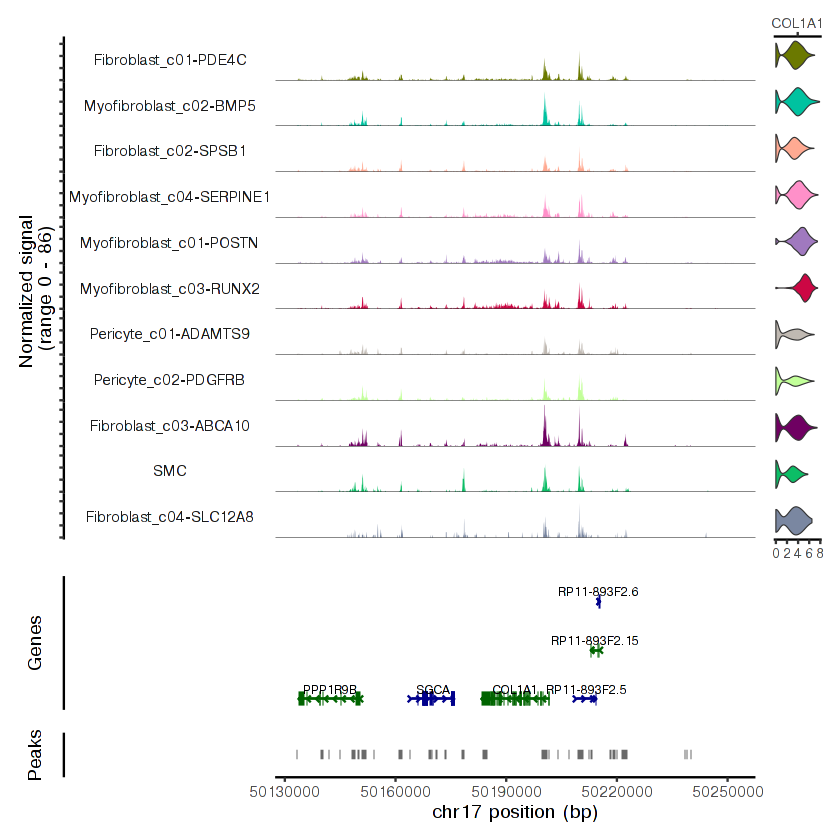

In [12]:
idents.plot<-rownames(table(adata$celltype))
CoveragePlot(
    object = adata,
    region = "COL1A1",
    features = "COL1A1",
    expression.assay = "RNA",
    idents = idents.plot,
    extend.upstream = 50000,
    extend.downstream = 50000,
)&scale_fill_manual(values = unname(CelltypeColors[idents.plot]))